## Brownian Motion Revisited

In notebook (3.1) we have shown that the trajectories of a Brownian motion can be solved by the following SDEs:

$$
\begin{array}{l}{X(t+\mathrm{d} t)=X(t)+\sqrt{2 D} \mathrm{d} W_{x}} \\ {Y(t+\mathrm{d} t)=Y(t)+\sqrt{2 D} \mathrm{d} W_{y}} \\ {Z(t+\mathrm{d} t)=Z(t)+\sqrt{2 D} \mathrm{d} W_{z}}\end{array}\text{---(1)}
$$

In this notebook, we relate the system of SDEs (1) to the classic deterministic description of diffusion.

## Fokker-Planck Equation

Compare the SDE system (1) with the following SDE:

$$
X(t+\Delta t)=X(t)+f(X(t), t) \Delta t+g(X(t), t)dW
$$

we know that $f(X(t), t)=0$ and $g(X(t), t)=\sqrt{2D}$. Because the Fokker-Planck equation has the form of

$$
\frac{\partial p}{\partial t}(x, t)=\frac{\partial^{2}}{\partial x^{2}}\left(\frac{g^{2}(x, t)}{2} p(x, t)\right)-\frac{\partial}{\partial x}(f(x, t) p(x, t))
$$

we know that the probability density $p_{x}(x, t)$ satisfies:

$$
\frac{\partial p_{x}}{\partial t}(x, t)=D \frac{\partial^{2} p_{x}}{\partial x^{2}}(x, t)
$$

where $ p_{x}(x, t) \mathrm{d} x$ is the probability that $X(t) \in[x, x+\mathrm{d} x)$.

Now let $p(x, y, z, t) \mathrm{d} x \mathrm{d} y \mathrm{d} z$ be the probability that $X(t) \in[x, x+\mathrm{d} x), Y(t) \in$ $[y, y+\mathrm{d} y)$ and $Z(t) \in[z, z+\mathrm{d} z)$ at time $t .$ And we have

$$
p(x, y, z, t)=p_{x}(x, t) p_{y}(y, t) p_{z}(z, t)
$$

Therefore,

$$
\begin{array}{l}{\frac{\partial}{\partial t}\left(p_{x}(x, t) p_{y}(y, t) p_{z}(z, t)\right)} \\ {\quad=D \frac{\partial^{2} p_{x}}{\partial x^{2}}(x, t) p_{y}(y, t) p_{z}(z, t)+D p_{x}(x, t) \frac{\partial^{2} p_{y}}{\partial y^{2}}(y, t) p_{z}(z, t)} \\ {\quad+D p_{x}(x, t) p_{y}(y, t) \frac{\partial^{2} p_{z}}{\partial z^{2}}(z, t)}\end{array}
$$

Rewrite the equation above, we have the following PDE:

$$
\frac{\partial p}{\partial t}=D\left(\frac{\partial^{2} p}{\partial x^{2}}+\frac{\partial^{2} p}{\partial y^{2}}+\frac{\partial^{2} p}{\partial z^{2}}\right)\text{---(2)}
$$

which is the **diffusion equation in three-dimensional space.** Again, we solve (2) with the initial condition of $p(x, y, z, 0)=\delta(x, y, z)$ to get:

$$
p(x, y, z, t)=\frac{1}{(4 D \pi t)^{3 / 2}} \exp \left[-\frac{x^{2}+y^{2}+z^{2}}{4 D t}\right]\text{---(3)}
$$

## One-Dimensional Diffusion with Reflecting Boundary

The 1D diffusion with reflecting boundary is solved by the following equation :
$$
\frac{\partial p}{\partial t}=D\frac{\partial^{2} p}{\partial x^{2}}\text{---(4)}
$$
and B.C. for the reflecting boundaries are:

$$
\frac{\partial p_{x}}{\partial x}(0, t)=\frac{\partial p_{x}}{\partial x}(L, t)=0
$$

Also, we can use SSA to simulate the 1D diffusion as:

1. Generate a normally distributed (with zero mean and unit variance) random number $\xi .$

2. Compute the position of the molecule at time $t+\Delta t$ by $X(t+\Delta t)=X(t)+\sqrt{2 D \Delta t} \xi$

3. If $X(t+\Delta t)$ is less than 0 , then $X(t+\Delta t)=-X(t)-\sqrt{2 D \Delta t} \xi$

4. If $X(t+\Delta t)$ is greater than $L$, then $ X(t+\Delta t)=2 L-X(t)-\sqrt{2 D \Delta t} \xi$

5. Continue with step $(1)$ for time $t+\Delta t$

In [1]:
import numpy as np
from scipy.stats import norm

def diff1D(x0,D,L,dt,Tend):
    xs = [x0]
    nstep=int(Tend/dt)
    ts = np.linspace(0,Tend,nstep)
    rv = norm()
    for i in range(nstep-1):
        temp = xs[-1]+np.sqrt(2*D*dt)*rv.rvs()
        if temp<0:
            temp = -temp
        elif temp>L:
            temp = 2*L-temp
        xs.append(temp)
    return ts,xs

# Here we use simple Euler Forward method to solve eqn.(4)

def fem(x0,D,L,N,dt,tol=0.000001):
    xs = np.linspace(0,L,N,endpoint=True)
    dx = xs[1]-xs[0]
    ps = np.zeros(N)
    ps[int(x0/dx)]=1
    # prep RHS at t
    rhs = np.zeros(N)
    cur = 2**23
    while cur>tol:
        for i in range(1,N-1):
            rhs[i] = (D/dx**2)*(ps[i+1] - 2*ps[i] + ps[i-1])
        rhs[N-1] = (2*D/dx**2)*(ps[N-2]-ps[N-1]) # B.C.
        rhs[0] = (2*D/dx**2)*(ps[1]-ps[0]) # B.C.
        rhs = rhs*dt
        cur = max(rhs)
        ps += rhs
    return xs, ps

In [17]:
Dcoeff = 0.0001
T = 600
dt = 0.1
length = 1
Nn=40
X0=0.5

_,Xs=diff1D(X0,Dcoeff,length,dt,T)

In [3]:
Xs2,Ps=fem(X0,Dcoeff,length,Nn,dt)

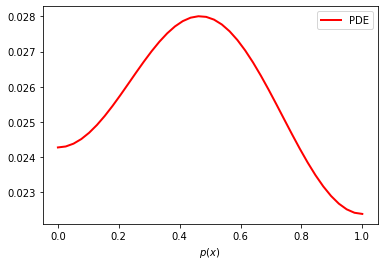

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Xs2,Ps,'r-',linewidth=2,label='PDE')
plt.xlabel('x')
plt.xlabel('$p(x)$')
plt.legend()

(array([203., 548., 709., 878., 779., 546., 570., 723., 802., 242.]),
 array([0.07613687, 0.13226438, 0.18839189, 0.2445194 , 0.30064691,
        0.35677442, 0.41290193, 0.46902944, 0.52515695, 0.58128446,
        0.63741197]),
 <a list of 10 Patch objects>)

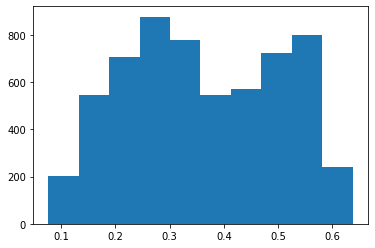

In [19]:
plt.hist(np.array(Xs),density=0)